<a href="https://colab.research.google.com/github/mokai1701/Team_4_Regression_Predict_API_Instructions/blob/master/team4_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

# Introduction

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the dataset

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
df_rider = pd.read_csv('Riders.csv') 
df_variable = pd.read_csv('VariableDefinitions.csv')

FileNotFoundError: ignored

In [ ]:
# Viewing the first five rows of the dataframe
df_rider.head()

NameError: ignored

In [ ]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


# Exploritory Data Analysis

In [ ]:
# viewing the summary of the datatypes in the dataframe, the total row and column number, and checking for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

# Data Cleaning and Formatting 

### Taking care of missing data

In [ ]:
# Filling in the null values with zeros for both the Temperature and Precipititation on millimeters columns for both the test and train dataframes
train1 = train.fillna(0, axis = 1)
test1 = test.fillna(0, axis = 1)

In [ ]:
# checking that the null values have been populated
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [ ]:
# checking that the null values have been populated
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

### Match the number of train columns to the number of test columns

In [ ]:
# save the columns from the test dataframe into a new list called testcols
testcols = test1.columns

# reassign the number of the train dataframe to match that of the test by saving them to an updated dataframe, newtrain
newtrain = train1[testcols]

# Seperate the target variable while at it
y = np.array(train1['Time from Pickup to Arrival']).reshape(-1, 1)

In [ ]:
# print the new columns of the train and test data to show that they are the same
print(newtrain.columns)
print(test1.columns)

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')
Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at 

### Combining the dataset for the base model

#### Proceed with caution: Only do this and only this for the base model, doing this for the actual model will return errors and it's not allowed. This is only done for base model submission purposes

In [ ]:
# creating a new dataframe from the concatenated newtrain and test1 dataframes
df = pd.concat([newtrain, test1])

# view the first five rows
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,16,26.4,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,3,0.0,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,9,19.2,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,9,15.4,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770


In [ ]:
# viewing the datatypes of the concatenated dataframe, for the sake of the base model, we want to do away with as many object type columns as possible
df.dtypes

Order No                                 object
User Id                                  object
Vehicle Type                             object
Platform Type                             int64
Personal or Business                     object
Placement - Day of Month                  int64
Placement - Weekday (Mo = 1)              int64
Placement - Time                         object
Confirmation - Day of Month               int64
Confirmation - Weekday (Mo = 1)           int64
Confirmation - Time                      object
Arrival at Pickup - Day of Month          int64
Arrival at Pickup - Weekday (Mo = 1)      int64
Arrival at Pickup - Time                 object
Pickup - Day of Month                     int64
Pickup - Weekday (Mo = 1)                 int64
Pickup - Time                            object
Distance (KM)                             int64
Temperature                             float64
Precipitation in millimeters            float64
Pickup Lat                              

Using a correlation heatmap to check for multicollinearity between predictor variables

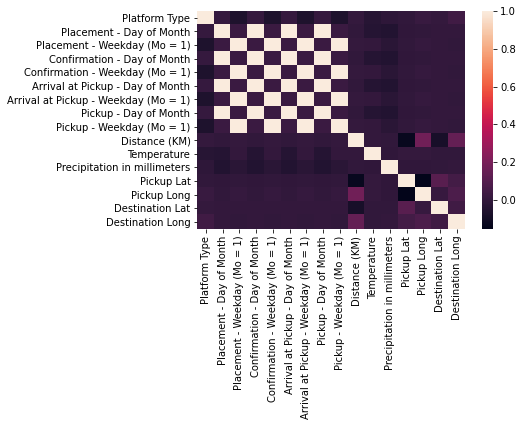

In [ ]:
corr = df.corr()
sns.heatmap(corr)

Dropping co-linear variables as well as time variables in order to reduce memory usage

### Team below is the error I am talking about, the Plan B I am having is to create a new df similar to the one that came from dropping the columns and see if I won't be able to progress to modelling.

### If anyone spots what keeps causing the error, please advise

In [ ]:
df = df.drop(['Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month','Pickup - Weekday (Mo = 1)', 'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time'], axis = 1)

In [ ]:
df_final = df.drop(['Order No', 'User Id', 'Vehicle Type', 'Rider Id'], axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_final.head()

,Platform Type,Personal or Business,Placement - Day of Month,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
0,3,Business,9,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741
1,3,Personal,12,16,26.4,0.0,-1.351453,36.899315,-1.295004,36.814358
2,3,Business,30,3,0.0,0.0,-1.308284,36.843419,-1.300921,36.828195
3,3,Business,15,9,19.2,0.0,-1.281301,36.832396,-1.257147,36.795063
4,1,Personal,13,9,15.4,0.0,-1.266597,36.792118,-1.295041,36.809817


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Platform Type                 28269 non-null  int64  
 1   Personal or Business          28269 non-null  object 
 2   Placement - Day of Month      28269 non-null  int64  
 3   Distance (KM)                 28269 non-null  int64  
 4   Temperature                   28269 non-null  float64
 5   Precipitation in millimeters  28269 non-null  float64
 6   Pickup Lat                    28269 non-null  float64
 7   Pickup Long                   28269 non-null  float64
 8   Destination Lat               28269 non-null  float64
 9   Destination Long              28269 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 2.4+ MB


In [ ]:
df_final = pd.get_dummies(df_final, drop_first=True)
df_final.head()

,Platform Type,Placement - Day of Month,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Personal or Business_Business,Personal or Business_Personal
0,3,9,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,1,0
1,3,12,16,26.4,0.0,-1.351453,36.899315,-1.295004,36.814358,0,1
2,3,30,3,0.0,0.0,-1.308284,36.843419,-1.300921,36.828195,1,0
3,3,15,9,19.2,0.0,-1.281301,36.832396,-1.257147,36.795063,1,0
4,1,13,9,15.4,0.0,-1.266597,36.792118,-1.295041,36.809817,0,1


In [ ]:
#y = np.array(train1['Time from Pickup to Arrival']).reshape(-1, 1)
finaltrain = df_final[:len(train)]
finaltest = df_final[len(train):]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(finaltrain, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
val_preds = lr.predict(x_val)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_predict):
  return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
rmse(y_val, val_preds)

797.0468983875842

In [ ]:
y_pred = lr.predict(finaltest)

In [ ]:
submission_df = test1[['Order No']]
submission_df['Time from Pickup to Arrival'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
submission_df

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1290.862912
1,Order_No_12736,1081.300485
2,Order_No_768,1058.000881
3,Order_No_15332,1105.787069
4,Order_No_21373,1194.660281
...,...,...
7063,Order_No_3612,1122.848121
7064,Order_No_7657,2894.321995
7065,Order_No_1969,1649.879452
7066,Order_No_10591,2611.831283


In [ ]:
submission_df.to_csv('base_pred.csv', index=False)

## Splitting the dataset into the Training set and Test set

## Training the Simple Linear Regression model on the Training set

## Predicting the Test set results

## Visualising the Training set results

## Visualising the Test set results